Muestra para cada dataset todo lo que se puede hacer con el none_box

In [1]:
from demo_utils.demo10 import Demo10
from demo_utils.general import SUPPORTED_DATASETS
from IPython.display import Markdown as md
from demo_utils.get_hyper_params import get_hyper_params

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# d10_data = {
# #     'dts_name': testing_dataset,
#     'dts_size': 1000,
#     'features_range': (500, 501),
#     'rbfsampler_gamma': 'UNUSED',
#     'nystroem_gamma': 'UNUSED',
#     'hparams': {'dt': {'max_depth': None,
#                        'min_samples_split': 2,
#                        'min_samples_leaf': 1,
#                        'min_weight_fraction_leaf': 0.0,
#                        'max_leaf_nodes': None,
#                        'min_impurity_decrease': 0.0},
#                 'logit': {'C': 1000.0},
#                 'linear_svc': {'C': 5}}
# }


In [ ]:
d10_data = {
#     'dts_name': testing_dataset,
    'dts_size': 5000,
    'features_range': (500, 501),
}

In [ ]:
def get_a_model(model_name, sampler_name, dts_name):
    box_type = 'grey_ens'
    n_estim = 50
    # más adelante habrá que soportar distintas box

    #     {'model_name': model_name,
    #      'sampler_name': 'identity',
    #      'sampler_gamma': None,
    #      'model_params': {},
    #      # 'box_type': 'none',
    #      'box_type': box_type,
    #      'n_estim': None,
    #      'pca': False,
    #      'pca_first': False}

    ret_dic = {'model_name': model_name,
#                'sampler_name': 'identity',
               'sampler_name': sampler_name,
               'sampler_gamma': None,
               'model_params': {},
               'box_type': box_type,
               'n_estim': n_estim,
               'pca': False,
               'pca_first': False}

    hyper_params = get_hyper_params(dts_name=dts_name, box_name=box_type,
                                    model_name=model_name, sampler_name=sampler_name)
    gamma = hyper_params.pop('gamma', None)
#     ret_dic['sampler_gamma'] = gamma
    ret_dic['gamma'] = gamma
#     ret_dic['model_params'] = hyper_params
    ret_dic['base_model_params'] = hyper_params
    
    if sampler_name == 'rff':
        ret_dic['sampler_name'] = 'rbf'
#     elif sampler_name == 'nystroem':
#         ret_dic['sampler_name'] = 'nystroem'
    
    
    return ret_dic

In [ ]:
def test_dt(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    dts_name = new_data['dts_name']
    model_name = 'dt'
    # dt solo, dt con rff y dt con nystroem
    
    m1 = get_a_model(model_name=model_name, sampler_name='identity', dts_name=dts_name)
    m2 = get_a_model(model_name=model_name, sampler_name='rff', dts_name=dts_name)
    m3 = get_a_model(model_name=model_name, sampler_name='nystroem', dts_name=dts_name)
    
    models = [m1, m2, m3,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)
    
def test_logit(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    dts_name = new_data['dts_name']
    model_name = 'logit'
    # logit solo, logit con rff y logit con nystroem
    
    m1 = get_a_model(model_name=model_name, sampler_name='identity', dts_name=dts_name)
    m2 = get_a_model(model_name=model_name, sampler_name='rff', dts_name=dts_name)
    m3 = get_a_model(model_name=model_name, sampler_name='nystroem', dts_name=dts_name)
    
    models = [m1, m2, m3,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)
    
def test_linear_svc(d10_data):
    d10 = Demo10()
    new_data = dict(d10_data)
    dts_name = new_data['dts_name']
    model_name = 'linear_svc'
    # linear_svc solo, linear_svc con rff y linear_svc con nystroem
    
    m1 = get_a_model(model_name=model_name, sampler_name='identity', dts_name=dts_name)
    m2 = get_a_model(model_name=model_name, sampler_name='rff', dts_name=dts_name)
    m3 = get_a_model(model_name=model_name, sampler_name='nystroem', dts_name=dts_name)
    
    models = [m1, m2, m3,]
    
    new_data['models'] = models
    d10.non_interactive(**new_data)

In [ ]:
def test_dataset(d10_data, dts_name):
    new_data = dict(d10_data)
    new_data['dts_name'] = dts_name
    display(md(f'# {dts_name}'))
    test_dt(new_data)
    test_logit(new_data)
    test_linear_svc(new_data)

In [ ]:
def test_everything():
    for dts_name in SUPPORTED_DATASETS:
#     for dts_name in ['mnist', 'segment']:
        test_dataset(d10_data, dts_name=dts_name)

# segment

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'),), layout=La…

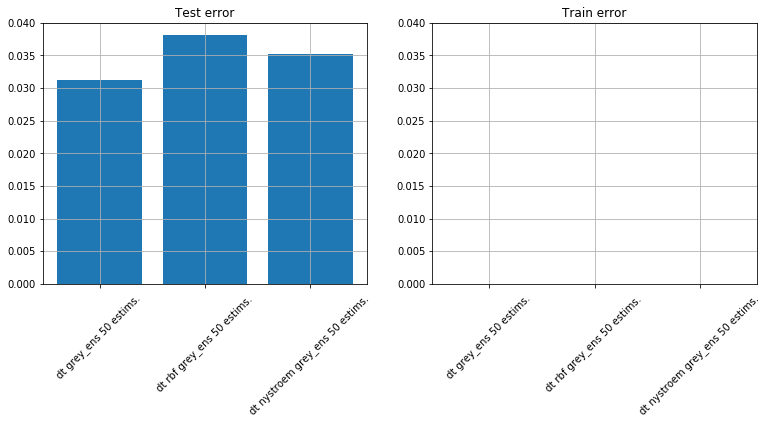

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'),), layout=La…

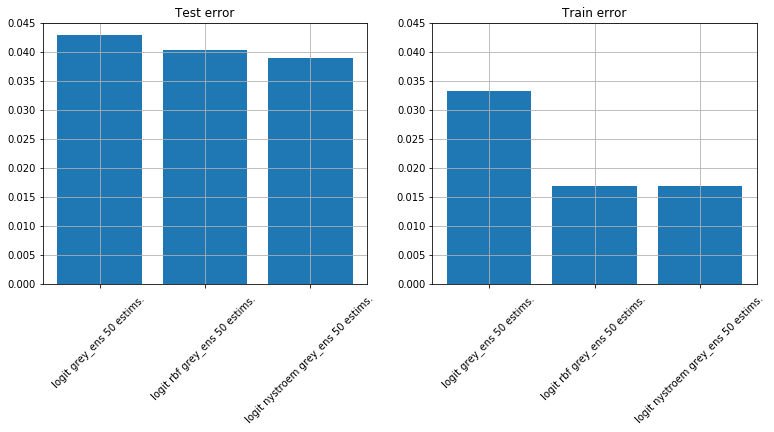

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'),), layout=La…

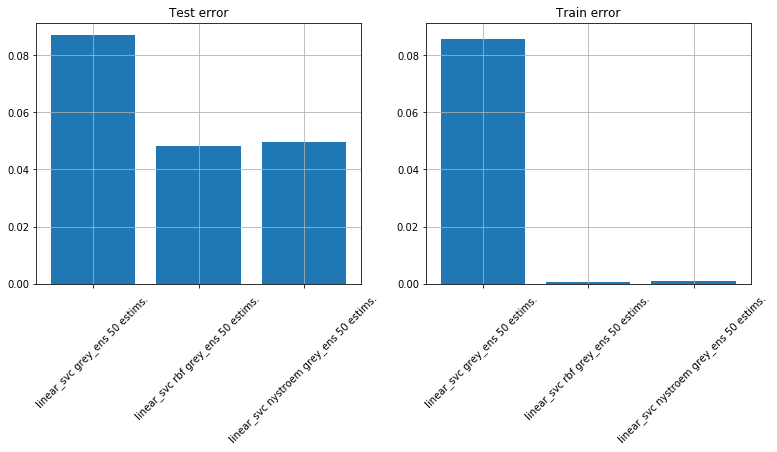

# covertype

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'),), layout=…

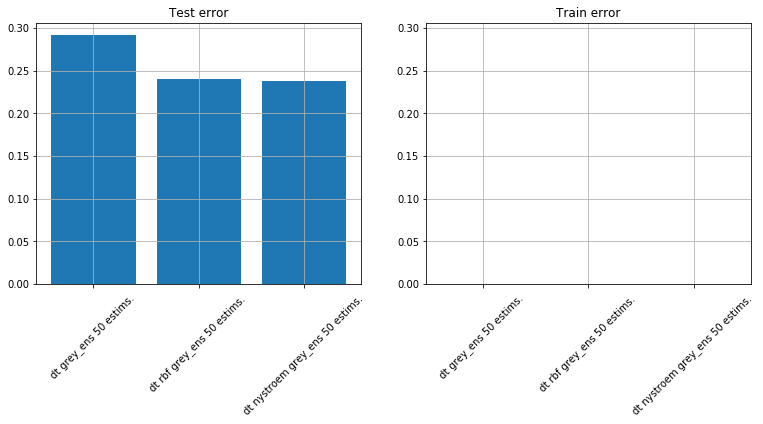

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'),), layout=…

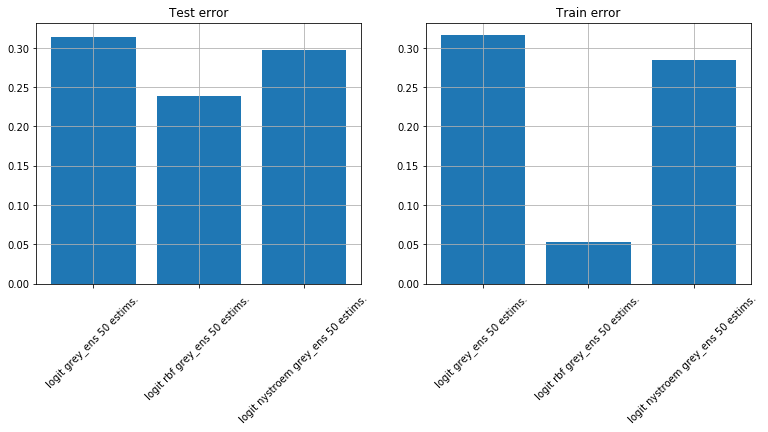

### Demo genérica v10

In [ ]:
test_everything()